In [1]:
import sqlite3

In [18]:
import pandas as pd

In [36]:
import matplotlib.pyplot as plt

In [38]:
# 1. Connect to SQLite database

In [40]:
conn = sqlite3.connect("sales_data.db")
cur = conn.cursor()

# Create a demo sales table (ONLY if your DB is empty)
cur.execute("""
    CREATE TABLE IF NOT EXISTS sales (
        product TEXT,
        quantity INTEGER,
        price REAL
    )
""")

In [42]:
# Insert demo data (skip if DB already has data)

In [44]:
cur.execute("DELETE FROM sales")
rows = [
    ("Pen", 10, 5),
    ("Pen", 7, 5),
    ("Notebook", 5, 30),
    ("Notebook", 3, 30),
    ("Eraser", 12, 3),
    ("Eraser", 8, 3)
]
cur.executemany("INSERT INTO sales VALUES (?, ?, ?)", rows)
conn.commit()

In [46]:
# 2. Run SQL Query to summarize
query = """
SELECT 
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""
df = pd.read_sql_query(query, conn)

In [48]:
# 3. Print output
print("Sales Summary by Product:")
print(df)

Sales Summary by Product:
    product  total_qty  revenue
0    Eraser         20     60.0
1  Notebook          8    240.0
2       Pen         17     85.0


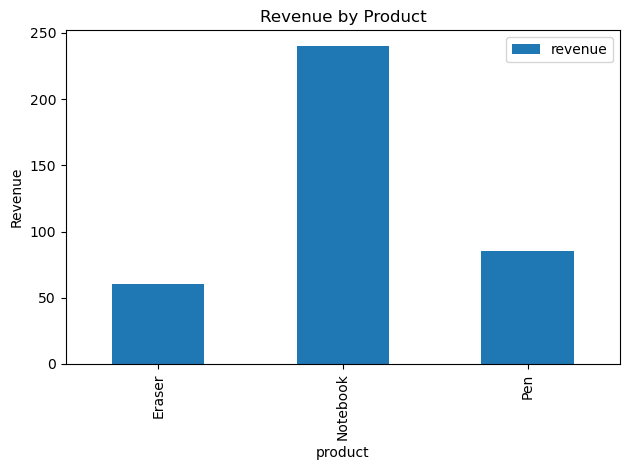

In [50]:
# 4. Bar chart of Revenue by Product
df.plot(kind="bar", x="product", y="revenue", title="Revenue by Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png")  # Save as file
plt.show()

conn.close()